In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
datadir = r"D:\zzStuff\MS_INFOTECH\04_Laboratory\DL_Lab\DLL_Datasets\IDRID_dataset\labels"
os.listdir(datadir)

['test.csv', 'train.csv']

In [22]:
df = pd.read_csv(datadir+'/train.csv')
df.drop(df.columns[3:], axis=1, inplace=True)
df.columns = ['Image', 'Grade', 'Risk']
grades = df['Grade'].unique()
grades.sort()
print(grades)
df.head()

[0 1 2 3 4]


,Image,Grade,Risk
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0


In [64]:
df2 = df.groupby('Grade')['Image'].nunique()


In [93]:
gr, im = ['0', '1'], []
v2, v3 = 0, 0
for i, v in enumerate(df2):
    if i < 2:
        v2 += v
    else:
        v3 += v
im.append(v2)
im.append(v3)

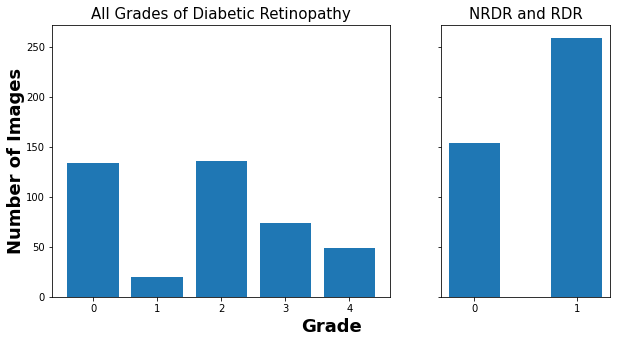

In [114]:
# Preparing the data to subplots
x = np.linspace(0, 10, 10)
y1 = x + 3
y2 = x + 9
y3 = x + 13
y4 = x + 17

# Defining figure and axes objects using matplotlib.pyplot.subplots(),
# specifying the sharing of x-axis and y-axis to the subplots
fig, ax = plt.subplots(1, 2, sharey=True, figsize=[10, 5], gridspec_kw={'width_ratios': [2, 1]})

# Plot the subplots
# Plot 1
ax[0].bar(grades, df2)
ax[0].set_title('All Grades of Diabetic Retinopathy', fontsize=15)

# Plot 2
ax[1].bar(gr, im, 0.5)
ax[1].set_title('NRDR and RDR', fontsize=15)

# Adding a plot in the figure which will encapsulate all the subplots with axis showing only
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.xlabel('Grade', fontsize=18, fontweight='bold')
plt.ylabel('Number of Images', fontsize=18, fontweight='bold')

plt.show()